# Метод градиентного спуска

### Данные

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

### Минимум

#### Функция

$$f=4x^2 + 2y^2 - xy + 4y$$

In [10]:
# Получение значения функции f в точки

def get_f(x_nparr, y_nparr):
    ret = 4*x_nparr**2 + 2*y_nparr**2 - x_nparr*y_nparr + 4*y_nparr
    return ret


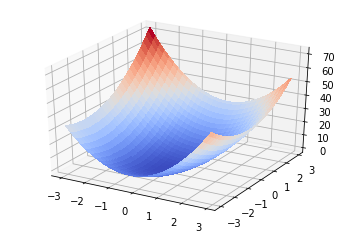

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-3, 3, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = get_f(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#### Производные

$$f'_x = 8x - y$$
$$f'_y = 4y - x + 4$$

In [12]:
# Получение значения производной функции f в точке

def get_f_p(x_nparr, y_nparr):
    px = 8 * x_nparr - y_nparr 
    py = 4 * y_nparr - x_nparr + 4
    return np.array([px, py])


### Максимум

#### Функция

$$f=-(4x^2 + 2y^2 - xy + 4y)$$

In [13]:
def get_f_rev(x_nparr, y_nparr):
    ret = 4*x_nparr**2 + 2*y_nparr**2 - x_nparr*y_nparr + 4*y_nparr
    return -ret


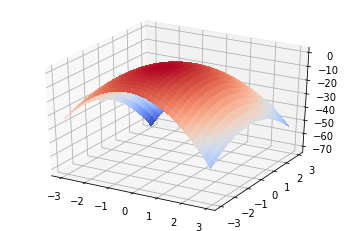

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-3, 3, 0.1)
Y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(X, Y)
Z = get_f_rev(X, Y)


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#### Производные

$$f'_x = -(8x - y)$$
$$f'_y = -(4y - x + 4)$$

In [15]:
# Получение значения производной функции f в точке

def get_f_p_rev(x_nparr, y_nparr):
    px = 8 * x_nparr - y_nparr 
    py = 4 * y_nparr - x_nparr + 4
    return np.array([-px, -py])


### Метод градиентного спуска с постоянным шагом

Условие остановки:

$$|F(\overrightarrow{x}^{[j+1]})- F(\overrightarrow{x}^{[j]})| < \varepsilon $$

In [16]:
def get_back_grad(xy_nparr, step, func, func_pr, eps=0.01, max_param = False):
    curr_diff = eps + 1
    coeff = 1 if not max_param else -1
    x_res = list()
    y_res = list()
    z_res = list()
    
    x_res.append(xy_nparr[0])
    y_res.append(xy_nparr[1])
    z_res.append(func(*xy_nparr))
    
    while curr_diff > eps:
        xy_next = xy_nparr - step * coeff * func_pr(*xy_nparr)
        f_old = coeff * func(*xy_nparr)
        f_new = coeff * func(*xy_next)
        curr_diff = abs(f_new - f_old)

        xy_nparr = xy_next.copy()
        x_res.append(xy_nparr[0])
        y_res.append(xy_nparr[1])
        z_res.append(func(*xy_nparr))
        
        
    return x_res, y_res, z_res
    

### Минимум

In [17]:
x_res, y_res, z_res = get_back_grad(np.array([-3, 2]), 0.01, get_f, get_f_p, eps=0.1)

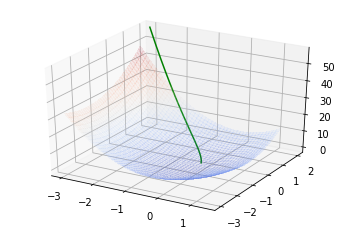

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-3, 1.5, 0.1)
Y = np.arange(-3, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = get_f(X, Y)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.1)

ax.plot(x_res, y_res, z_res, color='green')

### Максимум

In [19]:
x_res, y_res, z_res = get_back_grad(np.array([-3, 2]), 0.01, get_f_rev, get_f_p_rev, eps=0.1, max_param=True)

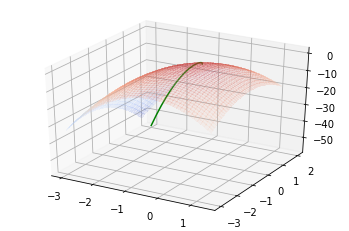

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-3, 1.5, 0.1)
Y = np.arange(-3, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = get_f_rev(X, Y)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.1)

ax.plot(x_res, y_res, z_res, color='green')